In [1]:
import numpy as np
from random import randint
from matplotlib import pyplot as plt
from tqdm import tqdm
from linearization import *
from matplotlib import animation
from mpl_toolkits import mplot3d
import cvxopt
import cvxpy as cp
from scipy.linalg import sqrtm

%matplotlib inline

Plot vectorfield for discretization n=2:

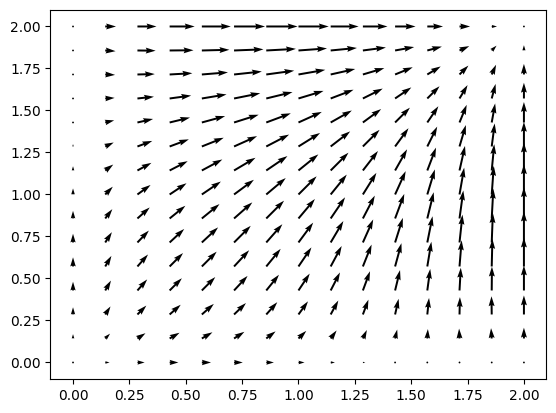

In [3]:
psicalc = PsiCalculator(n=2)
X = []
Y = []
U = []
V = []
for f1 in np.linspace(0,2.,15):
    for g1 in np.linspace(0.,2.,15):
        Psi = psicalc.computeReducedAt(np.array([[f1]]), np.array([[g1]]))
        U.append(Psi['Psif'][0])
        V.append(Psi['Psig'][0])
        X.append(f1)
        Y.append(g1)
plt.quiver(X,Y,U,V)
plt.show()

Run discretized replicator dynamics

  0%|          | 0/30000 [00:00<?, ?it/s]

100%|██████████| 30000/30000 [00:37<00:00, 800.66it/s] 


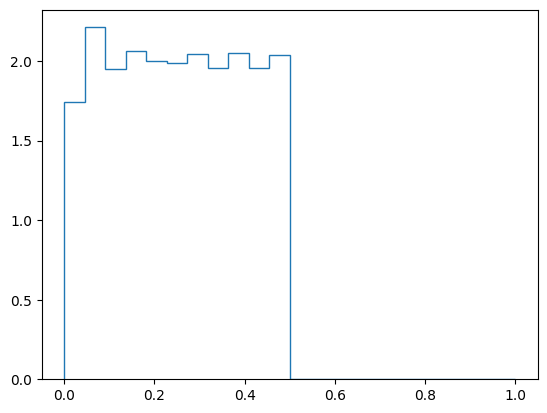

In [4]:
n = 22
psicalc = PsiCalculator(n)

f = 0.1 * np.ones((n,1))
f[0:1,0] = np.ones((1,))
f = f * n/f.sum()
g = 0.1 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
g = g * n/g.sum()
n_rounds = 30000
h = 0.1
gradient_norms = []
f_mins = []
grad_mins = []
for k in tqdm(range(n_rounds)):
    Psi = psicalc.computeAt(f,g)
    f_mins.append(f.min())
    grad_mins = Psi['Psif'].min()
    gradient_norms.append(np.linalg.norm(Psi['Psif']))
    f[:,0] += h*Psi['Psif']
    g[:,0] += h*Psi['Psig']
#plt.plot(f_mins)
#plt.plot(grad_mins)
plt.stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
plt.show()

Gradient for very 'flat' strategies

-0.0010258215000000003
-9.392321500000002e-05


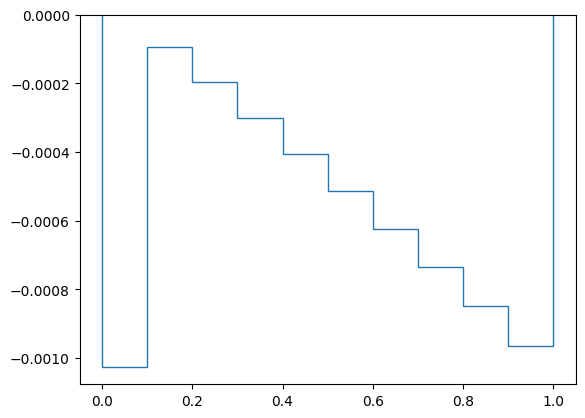

In [5]:
n = 10
psicalc = PsiCalculator(10)
f = 0.01 * np.ones((n,1))
f[0:1,0] = np.ones((1,))
g = 0.01 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
Psi = psicalc.computeAt(f,g)
print(Psi['Psif'][0])
print(Psi['Psif'][1])
plt.stairs(values=Psi['Psif'].flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
plt.show()

Animation

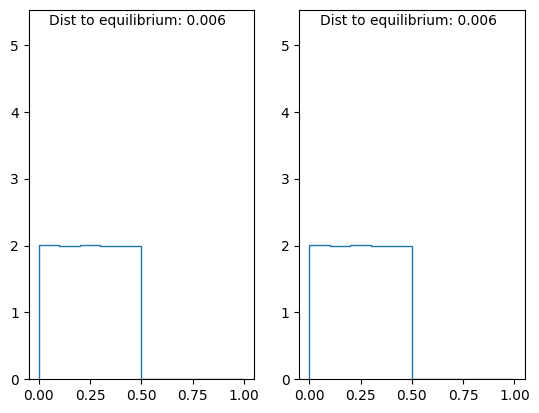

In [11]:


n = 10
psicalc = PsiCalculator(n)

equilibrium = np.zeros((n,1))
for i in range(int(n/2)):
    equilibrium[i,0] = 1.
equilibrium = equilibrium * n/equilibrium.sum()

f = 0.1 * np.ones((n,1))
f[4:5,0] = np.ones((1,))
f = f * n/f.sum()
g = 0.1 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
g = g * n/g.sum()
n_rounds = 2500
iterations_per_round = 4
h = 0.1

fig = plt.figure()
[ax1, ax2] = fig.subplots(nrows = 1, ncols = 2)
dist1_text = ax1.text(0.05,5.3,"Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(f-equilibrium)))
line1 = ax1.stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
dist2_text = ax2.text(0.05,5.3,"Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(g-equilibrium)))
line2 = ax2.stairs(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))

def drawframe(it):
    for _ in range(iterations_per_round):
        Psi = psicalc.computeAt(f,g)
        f[:,0] += h*Psi['Psif']
        g[:,0] += h*Psi['Psig']
    line1.set_data(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    dist1_text.set_text("Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(f-equilibrium)))
    line2.set_data(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    dist2_text.set_text("Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(g-equilibrium)))
    return (line1,line2,dist1_text,dist2_text)

anim = animation.FuncAnimation(fig, drawframe, frames = n_rounds, interval=10, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

Run zero-sum part

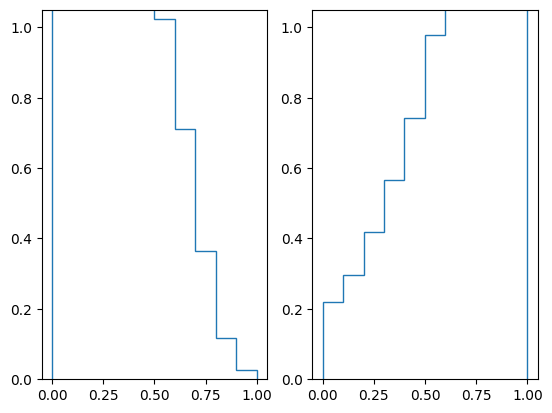

In [6]:
n = 10
B = create_B(n)
C = create_C(n)

f = np.ones((n,1))
#f[0:1,0] = np.ones((1,))
#f = f * n/f.sum()
g = np.ones((n,1))
#g[0:1,0] = np.ones((1,))
#g = g * n/g.sum()

n_rounds = 2000
iterations_per_round = 4
h = 0.05

fig = plt.figure()
[ax1, ax2] = fig.subplots(nrows = 1, ncols = 2)
line1 = ax1.stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
line2 = ax2.stairs(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))

def drawframe(it):
    for _ in range(iterations_per_round):
        beta = get_beta(n,B,C,f,g)
        update = beta - np.sum(beta)*(1./n)*np.ones_like(beta)
        f[:,0] += h*update
        g[:,0] -= h*update
    line1.set_data(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    line2.set_data(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    return (line1,line2,)

anim = animation.FuncAnimation(fig, drawframe, frames = n_rounds, interval=15, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

Motivation:

A profile (x*,y*) is a strong uninvadable profile, if u(x*,y) > u(x,y) for all x,y in a neighbourhood of (x*,y*) for all players. (see e.g. Mendoza-Palacios 2015)

Random permutations of f* and g*:

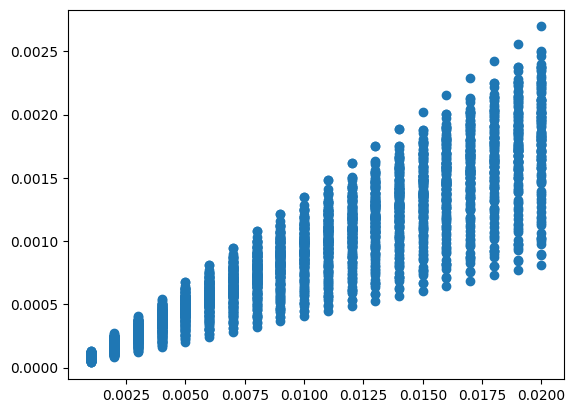

In [22]:
n = 20

f_equil = np.zeros((n,))
for i in range(int(n/2)):
    f_equil[i] = 2
F_equil = np.cumsum(f_equil)/n
g_equil = np.zeros((n,))
for i in range(int(n/2)):
    g_equil[i] = 2
G_equil = np.cumsum(g_equil)/n
g_truthful = np.ones((n,))


distance_to_equil = []
utility_diff = []

n_samples = 200
min_dist = 0.001
max_dist = 0.02
n_dists = 20


fig = plt.figure()
ax = fig.subplots(1,1)


for _ in range(n_samples):
    f = random_density(n)
    deltaf = (f - f_equil)/L2norm(f-f_equil)
    F = np.cumsum(f)/n
    deltaF = (f-f_equil)/L2norm(F-F_equil)
    g = random_density(n)
    deltag = (g-g_equil)/L2norm(g-g_equil)
    G = np.cumsum(g)/n
    deltaG = (g-g_equil)/L2norm(G-G_equil)
    for a in np.linspace(min_dist,max_dist,n_dists):
        if np.min(f + a*deltaf) < 0 or np.min(g + a*deltag) < 0:
            break
        distance_to_equil.append(a)
        utility_diff.append(compute_utility(n,f_equil,g_equil+a*deltag) - compute_utility(n,f_equil+a*deltaf,g_equil+a*deltag))
        #ax.plot(a, compute_utility(n,f_equil,g_equil+a*deltag) - compute_utility(n,f_equil+a*deltaf,g_equil+a*deltag))
plt.scatter(distance_to_equil, utility_diff)
plt.show()

Check if best respone dynamics works

KeyboardInterrupt: 

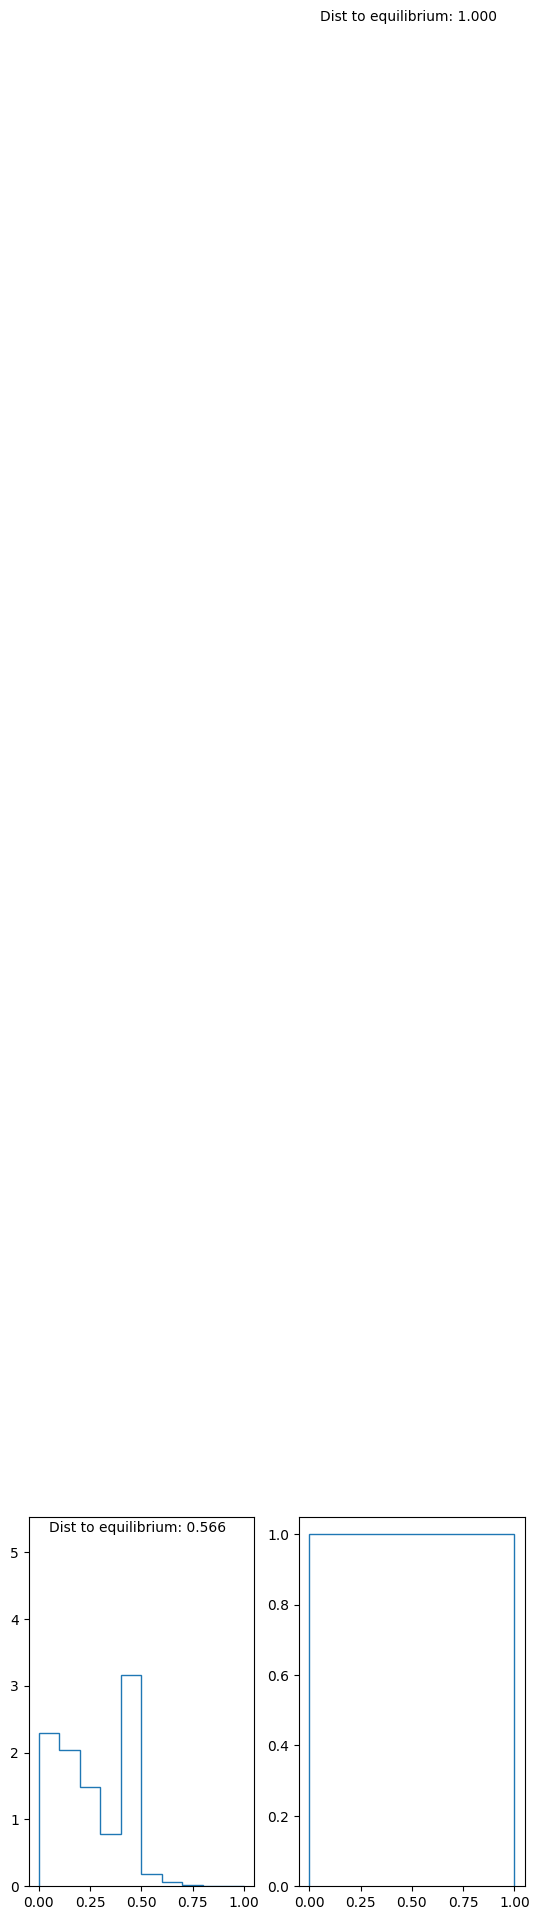

In [7]:


n = 10
psicalc = PsiCalculator(n)

equilibrium = np.zeros((n,1))
for i in range(int(n/2)):
    equilibrium[i,0] = 1.
equilibrium = equilibrium * n/equilibrium.sum()

f = 0.1 * np.ones((n,1))
f[4:5,0] = np.ones((1,))
f = f * n/f.sum()
g = 0.1 * np.ones((n,1))
#g[0:1,0] = np.ones((1,))
g = g * n/g.sum()
n_rounds = 1000
h = 0.2

fig = plt.figure()
[ax1, ax2] = fig.subplots(nrows = 1, ncols = 2)
dist1_text = ax1.text(0.05,5.3,"Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(f-equilibrium)))
line1 = ax1.stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
dist2_text = ax2.text(0.05,5.3,"Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(g-equilibrium)))
line2 = ax2.stairs(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))

def drawframe(it):
    global f
    f = compute_best_response(g, psicalc, f, 1, h)
    line1.set_data(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    dist1_text.set_text("Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(f-equilibrium)))
    line2.set_data(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    dist2_text.set_text("Dist to equilibrium: %.3f" % (np.sqrt(1./n)*np.linalg.norm(g-equilibrium)))
    return (line1,line2,dist1_text,dist2_text)

anim = animation.FuncAnimation(fig, drawframe, frames = n_rounds, interval=10, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [02:23<00:00, 14.36s/it]


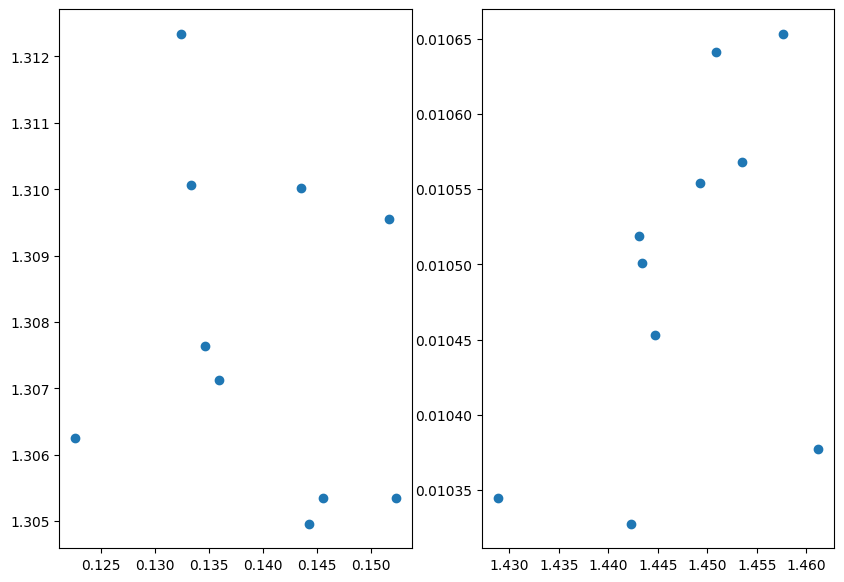

In [12]:
n = 50

f_equil = np.zeros((n,))
for i in range(int(n/2)):
    f_equil[i] = 2
F_equil = np.cumsum(f_equil)/n
g_equil = np.zeros((n,))
for i in range(int(n/2)):
    g_equil[i] = 2
G_equil = np.cumsum(g_equil)/n
g_truthful = np.ones((n,))


distance_to_equil = []
utility_diff = []
distance_g = []
distance_f = []

n_samples = 10


#plt.ion()


psicalc = PsiCalculator(n)

for _ in tqdm(range(n_samples)):
    g = 0.9*g_equil + 0.1*random_density(n)
    dist_g = L2norm(g-g_equil)
    f = compute_best_response_sg(g,psicalc,np.ones_like(f_equil),n_iterations=2000, h=0.005, max_dist_to_start=np.inf)
    #f = compute_penalized_best_response(g, psicalc, f_equil, penalty=0.008, h=0.05, accuracy=0.001, max_iter=10000)
    #ax[0].stairs(values=f.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    #ax[0].stairs(values=f_equil.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    #ax[1].stairs(values=g.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))
    #plt.show()
    #break
    distance_g.append(dist_g)
    distance_f.append(L2norm(f-f_equil))
    utility_diff.append(compute_utility(n,f_equil,g) - compute_utility(n,f,g))


fig = plt.figure(figsize = (10, 7))
ax = fig.subplots(1,2)
ax[0].scatter(distance_g, distance_f)
ax[1].scatter(np.array(distance_g)+np.array(distance_f), utility_diff)

#fig = plt.figure(figsize = (10, 7))
#ax = plt.axes(projection ="3d")
#ax.scatter3D(distance_g, distance_f, utility_diff)
#plt.title("simple 3D scatter plot")
# show plot
#plt.show()

0.15792079523633837
0.15792073600921083


c:\Users\Maximilian Fichtl\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


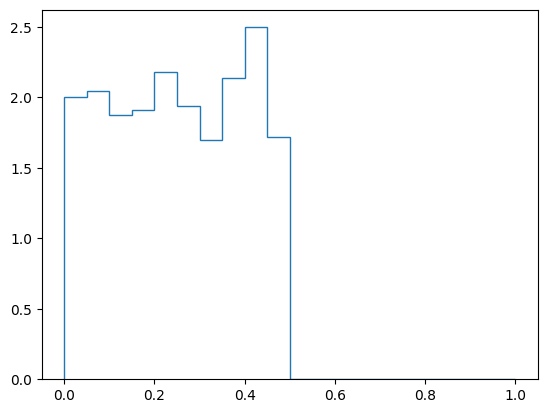

In [12]:

n = 20

f_truthful = np.ones((n,))
g_truthful = np.ones((n,))

f_equil = np.zeros((n,))
for i in range(int(n/2)):
    f_equil[i] = 1
f_equil = n * f_equil / np.sum(f_equil)
g_equil = np.zeros((n,))
for i in range(int(n/2)):
    g_equil[i] = 1
g_equil = n * g_equil / np.sum(g_equil)

g = 0.9*g_equil + 0.1*random_density(n)
dist_g = L2norm(g-g_equil)

br = best_response_in_neighbourhood(f_equil, g, dist_g)
print(dist_g)
print(L2norm(f_equil-br['strategy']))


plt.stairs(values=br['strategy'], edges=np.linspace(start = 0.,stop = 1., num=n+1))




In [2]:
n = 10
psicalc = PsiCalculator(n)

equilibrium = np.zeros((n,1))
for i in range(int(n/2)):
    equilibrium[i,0] = 1.
equilibrium = equilibrium * n/equilibrium.sum()

f = 0.1 * np.ones((n,1))
f[4:5,0] = np.ones((1,))
f = f * n/f.sum()
g = 0.1 * np.ones((n,1))
g[0:1,0] = np.ones((1,))
g = g * n/g.sum()
n_rounds = 1000
h = 0.01

fbr = compute_penalized_best_response(g, psicalc, equilibrium, penalty=0, h=h, accuracy=0.001, max_iter=10000)
plt.stairs(values=fbr.flatten(), edges=np.linspace(start = 0.,stop = 1., num=n+1))

KeyboardInterrupt: 